# ---------------------------Exploratory Data Analysis of IPL Dataset--------------------------

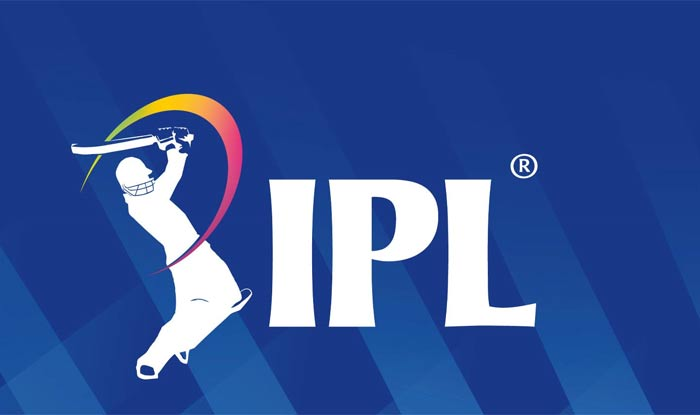

# 1 Setting The Working Enviroment

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2 Importing The Datasets

In [3]:
match_data = pd.read_csv("Match_data.csv")
ball_data  = pd.read_csv("Ball_data.csv")

# 3 Data Explorationg

In [4]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [6]:
ball_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [11]:
match_data.shape 

(816, 17)

In [8]:
match_data.isnull().sum()    #Checking If Match Data Has Any Null/Missing Values

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [12]:
ball_data.shape

(193468, 18)

In [9]:
ball_data.isnull().sum()    #Checking If Ball Data Has Any Null/Missing Values

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

# 4  Exploring Match Dataset

In [13]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [18]:
print("Matches Played So Far : ",match_data.shape[0])
print("\nCities Where Matches Have Been Played At : ",match_data['city'].unique())
print("\nTeams Participated : ",match_data['team1'].unique())


Matches Played So Far :  816

Cities Where Matches Have Been Played At :  ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

Teams Participated :  ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


## Adding A Column "Season", Which Will Contain Year In Which The Match Was Played. Year Value Will Be Extracted From "date" Value Of The Match Using "DatetimeIndex" Method Of Pandas.

In [23]:
match_data["Season"]=pd.DatetimeIndex(match_data['date']).year
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


### Total Number Of Matches Played In Each Seasons

In [30]:
matches_per_season = match_data.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'matches'})
matches_per_season

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


C:\Users\Avinash Kharate\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


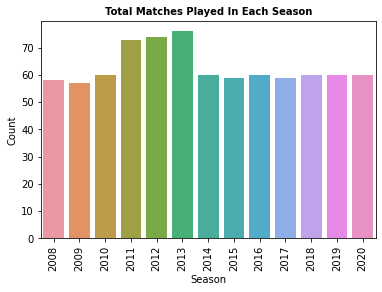

In [34]:
sns.countplot(match_data["Season"])
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Season",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.title("Total Matches Played In Each Season",fontsize=10,fontweight="bold")
plt.show()

### Merging "Match Data" and "Ball Data" Using Left Join On Basis of Common Column "id".

In [38]:
season_data = match_data[["id","Season"]].merge(ball_data,left_on='id',right_on='id',how='left').drop('id',axis=1)
season_data.head()

,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


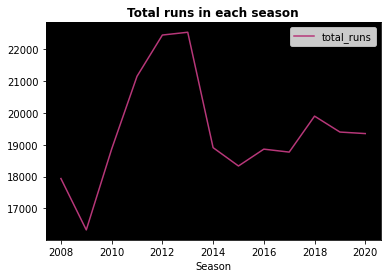

In [43]:
season=season_data.groupby(['Season'])['total_runs'].sum().reset_index()
p=season.set_index('Season')
ax = plt.axes()
ax.set(facecolor = "black")

sns.lineplot (data=p,palette="magma")
plt.title('Total runs in each season', fontsize=12, fontweight="bold")
plt.show()


##### ------------Trend Of Runs According To Seasons ------------

## Average Runs Scored Per Match In Each Season

In [47]:
runs_per_season =pd.concat([matches_per_season, season.iloc[:,1]], axis=1)
runs_per_season['Runs scored per match']=runs_per_season['total_runs']/runs_per_season['matches']
runs_per_season.set_index('Season', inplace=True)
runs_per_season


,matches,total_runs,Runs scored per match
Season,,,
2008,58,17937,309.258621
2009,57,16320,286.315789
2010,60,18864,314.400000
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22541,296.592105
2014,60,18909,315.150000
2015,59,18332,310.711864
2016,60,18862,314.366667


## Tosses Won By Each Teams

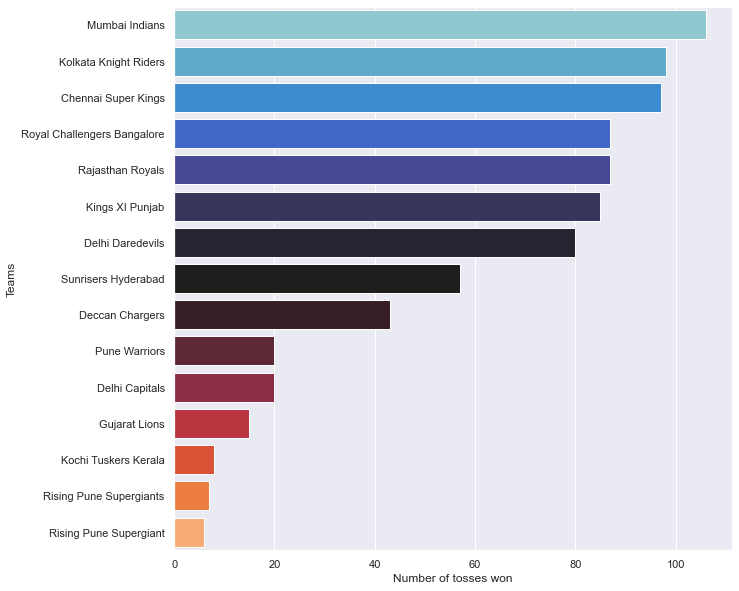

In [61]:
toss=match_data['toss_winner'].value_counts()
plt.axes()
ax.set(facecolor = "grey")
sns.set(rc={'figure.figsize':(10,15)}, style='darkgrid')
ax.set_title('No. of tosses won by each team', fontsize=15, fontweight="bold")
sns.barplot(y=toss.index, x=toss, orient='h', palette="icefire", saturation=1)
plt.xlabel('Number of tosses won')
plt.ylabel ('Teams')
plt.show()


## Toss Decision Won By Each Teams

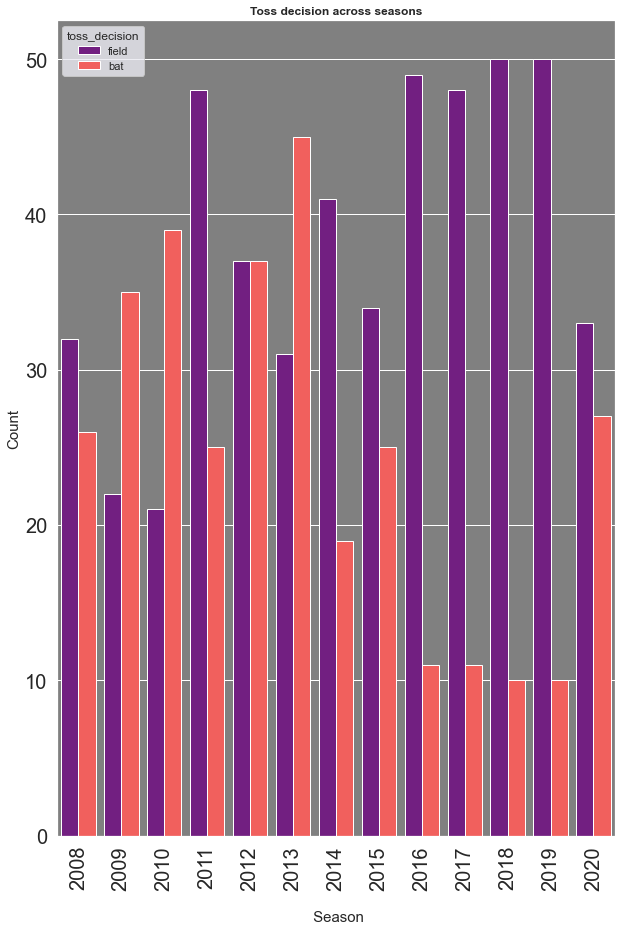

In [86]:
ax = plt.axes ()
ax.set(facecolor = "grey")
sns.countplot(x='Season', hue='toss_decision', data=match_data,palette="magma", saturation=1)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('\n Season', fontsize=15)
plt.ylabel ('Count', fontsize=15)
plt.title('Toss decision across seasons', fontsize=12, fontweight="bold")
plt.show()



In [65]:
 match_data['result'].value_counts()


wickets    435
runs       364
tie         13
Name: result, dtype: int64

#### Number of Matches Won By Wickets Are More Than Number Of Matches Won By Runs ,i.e In Most Of The Matches Team Batting Second Have Won The Match.

In [69]:
match_data.venue[match_data.result=='wickets'].mode()

0    Eden Gardens
dtype: object

#### Eden Gardens Is The Best Stadium For Batting Second.

In [71]:
match_data.venue[match_data.result=='runs'].mode()

0    Feroz Shah Kotla
1    Wankhede Stadium
dtype: object

#### Feroz Shah Kotla and Wankhede Stadium Is The Best Stadium For Batting First.

In [83]:
teams=match_data['team1'].unique()
print("Best Stadium For Each Team")
for team in teams:
    print(f"{team} \n {match_data.venue[match_data.winner==team].mode()}[5:]\n\n ")

Best Stadium For Each Team
Royal Challengers Bangalore 
 0    M Chinnaswamy Stadium
dtype: object[5:]

 
Kings XI Punjab 
 0    Punjab Cricket Association Stadium, Mohali
dtype: object[5:]

 
Delhi Daredevils 
 0    Feroz Shah Kotla
dtype: object[5:]

 
Mumbai Indians 
 0    Wankhede Stadium
dtype: object[5:]

 
Kolkata Knight Riders 
 0    Eden Gardens
dtype: object[5:]

 
Rajasthan Royals 
 0    Sawai Mansingh Stadium
dtype: object[5:]

 
Deccan Chargers 
 0                             Barabati Stadium
1    Rajiv Gandhi International Stadium, Uppal
dtype: object[5:]

 
Chennai Super Kings 
 0    MA Chidambaram Stadium, Chepauk
dtype: object[5:]

 
Kochi Tuskers Kerala 
 0    Nehru Stadium
dtype: object[5:]

 
Pune Warriors 
 0    Subrata Roy Sahara Stadium
dtype: object[5:]

 
Sunrisers Hyderabad 
 0    Rajiv Gandhi International Stadium, Uppal
dtype: object[5:]

 
Gujarat Lions 
 0    Saurashtra Cricket Association Stadium
dtype: object[5:]

 
Rising Pune Supergiants 
 0    Dr. Y.S.

### For Most of The Teams , The Most Favourable Stadium Is Their Homeground Itself. 

In [88]:
match_data.winner[match_data.result=='wickets'].mode()

0    Kolkata Knight Riders
dtype: object

#### Best Chasing Team Is Kolkata Knight Riders

In [89]:
match_data.winner[match_data.result=='runs'].mode()


0    Mumbai Indians
dtype: object

#### Best Defending Team Is Mumbai Indians

C:\Users\Avinash Kharate\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


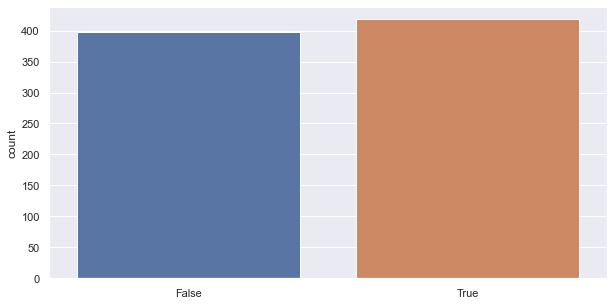

In [91]:
## How Much Winning The Toss Reflect The Result Of Match ?

toss = match_data['toss_winner'] == match_data['winner']
plt.figure(figsize=(10,5))
sns.countplot(toss)
plt.show()


C:\Users\Avinash Kharate\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


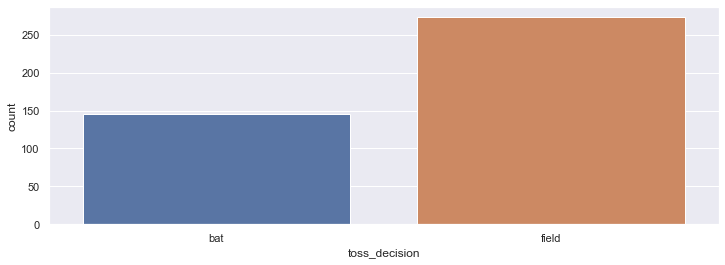

In [95]:
# Toss Dicision Affecting The Result Of Match
plt.figure(figsize= (12,4))
sns.countplot(match_data.toss_decision[match_data.toss_winner==match_data.winner])
plt.show()


#### In Most Of The Matches , Team Chosing Field First Have Resuled in Winning The Match

# 5 Exploring "Ball" Dataset


### Exploring Data Related To Particular Player

###  Rohit Sharma

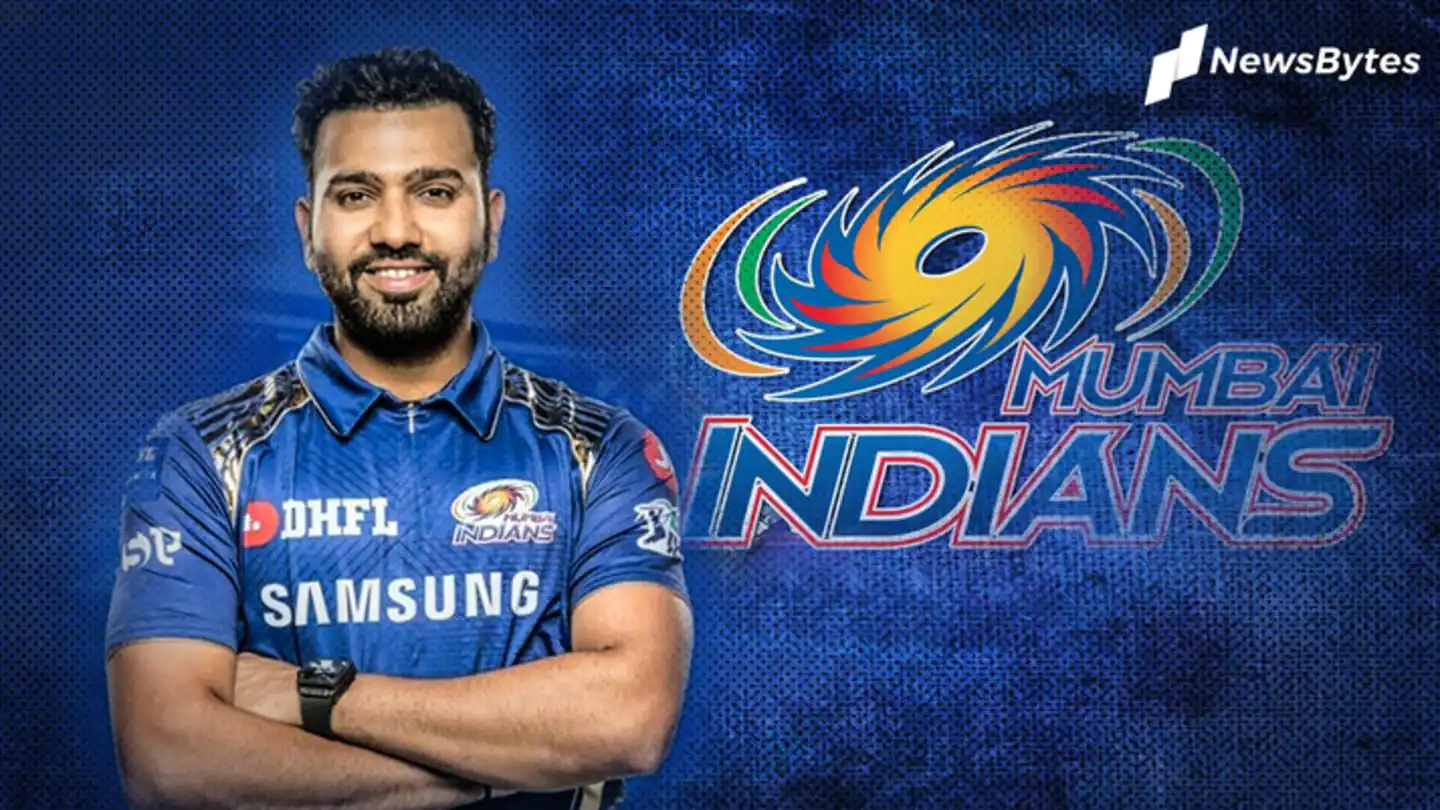

In [123]:
player = (ball_data[ 'batsman']=='RG Sharma')
df_rohit=ball_data[player]
df_rohit.head()



,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
1070,335986,1,8,2,RG Sharma,A Symonds,M Kartik,0,0,0,0,0,NaN,NaN,NaN,NaN,Deccan Chargers,Kolkata Knight Riders
1071,335986,1,8,3,RG Sharma,A Symonds,M Kartik,0,0,0,0,0,NaN,NaN,NaN,NaN,Deccan Chargers,Kolkata Knight Riders
1072,335986,1,8,4,RG Sharma,A Symonds,M Kartik,0,0,0,0,1,caught,RG Sharma,WP Saha,NaN,Deccan Chargers,Kolkata Knight Riders
1458,335988,1,13,3,RG Sharma,SB Bangar,VY Mahesh,1,0,1,0,0,NaN,NaN,NaN,NaN,Deccan Chargers,Delhi Daredevils
1460,335988,1,13,5,RG Sharma,SB Bangar,VY Mahesh,1,0,1,0,0,NaN,NaN,NaN,NaN,Deccan Chargers,Delhi Daredevils


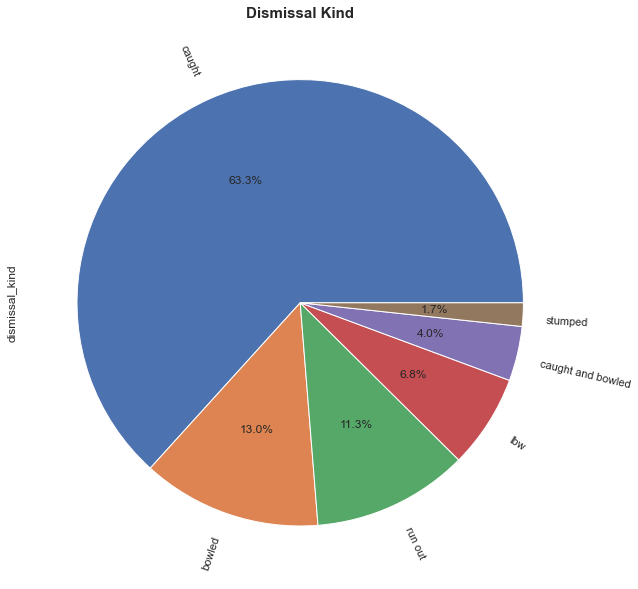

In [124]:
df_rohit['dismissal_kind'].value_counts ().plot.pie(autopct='%1.1f%%', shadow=False, rotatelabels=True)
plt.title("Dismissal Kind", fontweight="bold", fontsize=15)
plt.show()


In [125]:
def count (df_rohit, runs):
    return len(df_rohit[df_rohit['batsman_runs']==runs])*runs


In [126]:
print("Runs scored from 1's :",count (df_rohit, 1))
print("Runs scored from 2's :",count (df_rohit, 2))
print("Runs scored from 3's :",count (df_rohit,3))
print("Runs scored from 4's :",count (df_rohit,4))
print("Runs scored from 6's :",count (df_rohit,6))


Runs scored from 1's : 1663
Runs scored from 2's : 428
Runs scored from 3's : 18
Runs scored from 4's : 1832
Runs scored from 6's : 1284


In [145]:
print("Total Runs Scored By : Rohit Sharma :",df_rohit['batsman_runs'].sum())

Total Runs Scored By : Rohit Sharma : 5230


## Virat Kohli

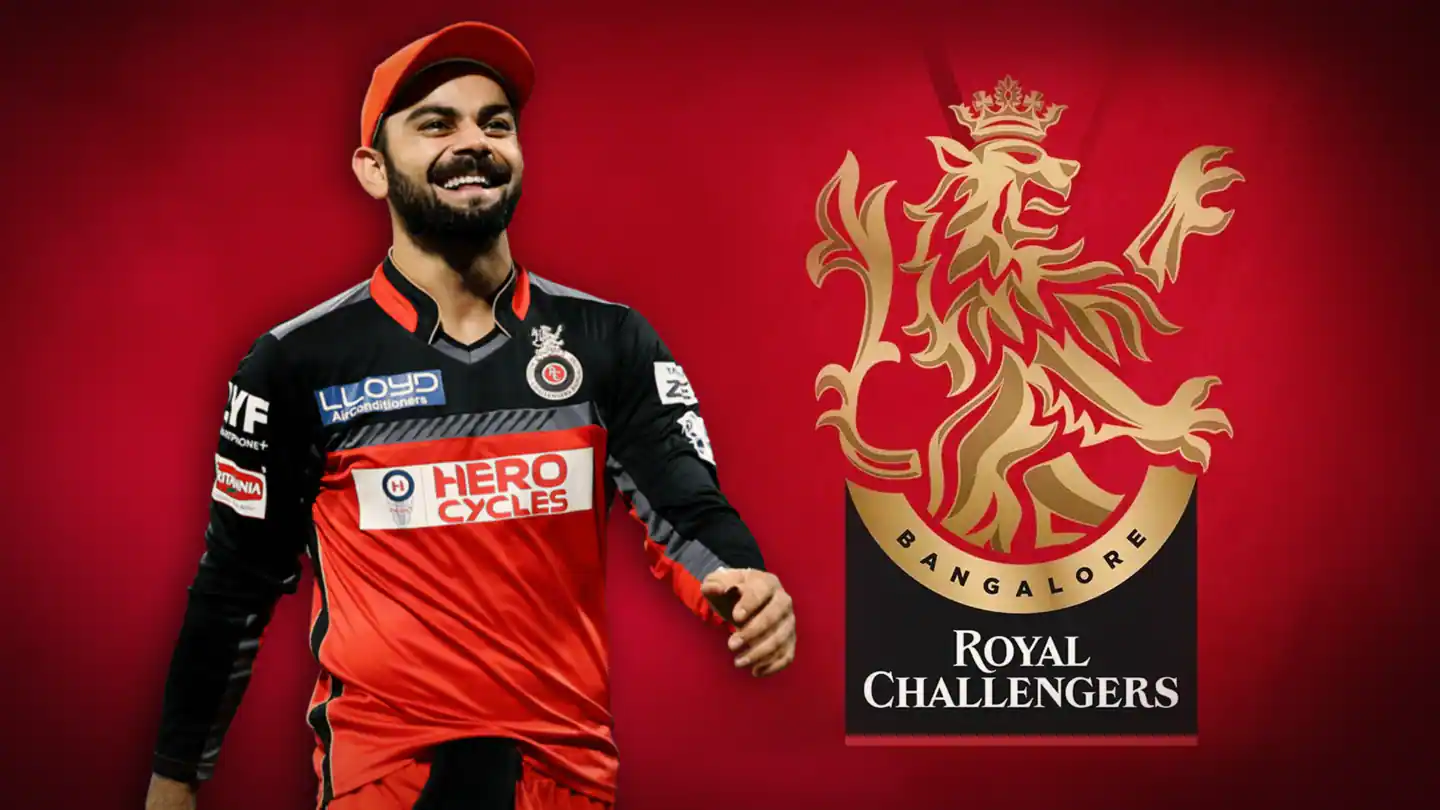

In [128]:
player = (ball_data[ 'batsman']=='V Kohli')
df_virat=ball_data[player]
df_virat.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
211,335982,2,1,2,V Kohli,W Jaffer,I Sharma,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
212,335982,2,1,3,V Kohli,W Jaffer,I Sharma,0,4,4,0,0,NaN,NaN,NaN,legbyes,Royal Challengers Bangalore,Kolkata Knight Riders
213,335982,2,1,4,V Kohli,W Jaffer,I Sharma,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
216,335982,2,2,1,V Kohli,W Jaffer,AB Dinda,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
217,335982,2,2,2,V Kohli,W Jaffer,AB Dinda,0,0,0,0,1,bowled,V Kohli,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders


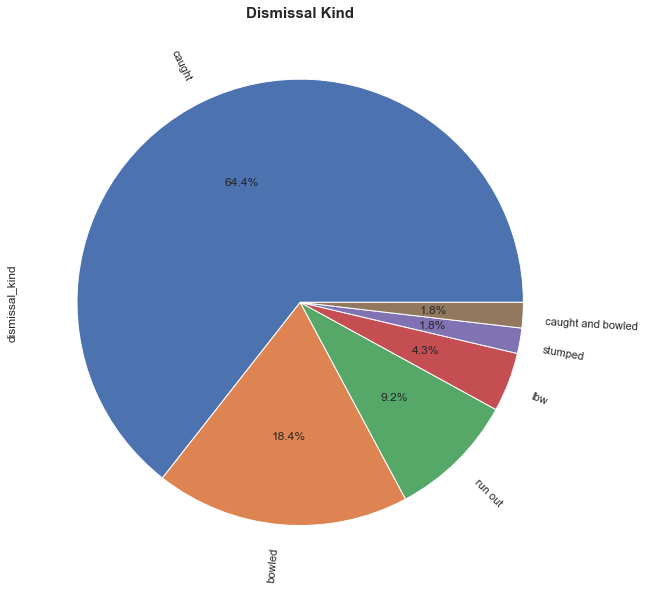

In [129]:
df_virat['dismissal_kind'].value_counts ().plot.pie(autopct='%1.1f%%', shadow=False, rotatelabels=True)
plt.title("Dismissal Kind", fontweight="bold", fontsize=15)
plt.show()

In [130]:
def count (df_rohit, runs):
    return len(df_virat[df_virat['batsman_runs']==runs])*runs


In [131]:
print("Runs scored from 1's :",count (df_virat, 1))
print("Runs scored from 2's :",count (df_virat, 2))
print("Runs scored from 3's :",count (df_virat,3))
print("Runs scored from 4's :",count (df_virat,4))
print("Runs scored from 6's :",count (df_virat,6))

Runs scored from 1's : 1919
Runs scored from 2's : 692
Runs scored from 3's : 39
Runs scored from 4's : 2016
Runs scored from 6's : 1212


In [161]:
print("Total Runs Scored By : Virat Kohli :",df_virat['batsman_runs'].sum())

Total Runs Scored By : Virat Kohli : 5878


## Lasith Malinga

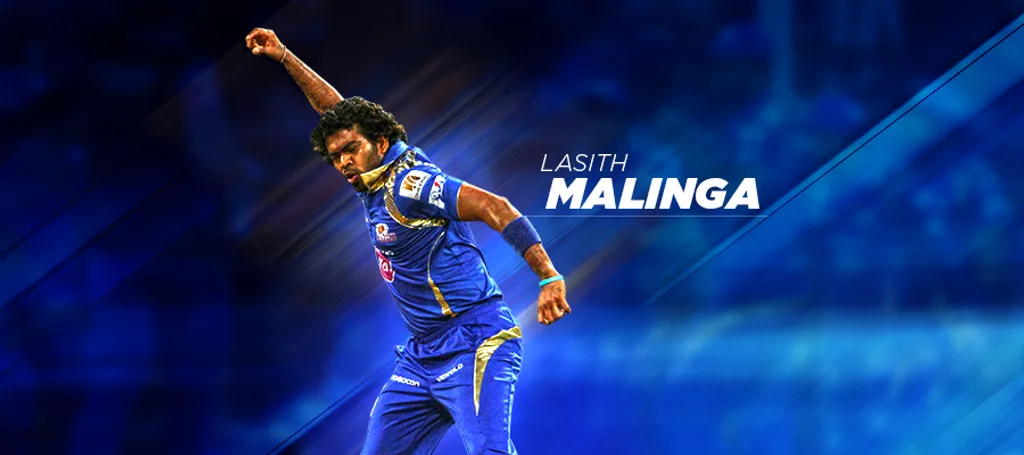

In [196]:
player = (ball_data[ 'bowler']=='SL Malinga')
df_malinga=ball_data[player]
df_malinga.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
13658,392181,2,15,1,MS Dhoni,S Badrinath,SL Malinga,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Mumbai Indians
13659,392181,2,15,2,MS Dhoni,S Badrinath,SL Malinga,1,0,1,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Mumbai Indians
13660,392181,2,15,3,S Badrinath,MS Dhoni,SL Malinga,0,0,0,0,1,caught,S Badrinath,DJ Bravo,NaN,Chennai Super Kings,Mumbai Indians
13661,392181,2,15,4,Joginder Sharma,MS Dhoni,SL Malinga,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Mumbai Indians
13662,392181,2,15,5,Joginder Sharma,MS Dhoni,SL Malinga,1,0,1,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Mumbai Indians


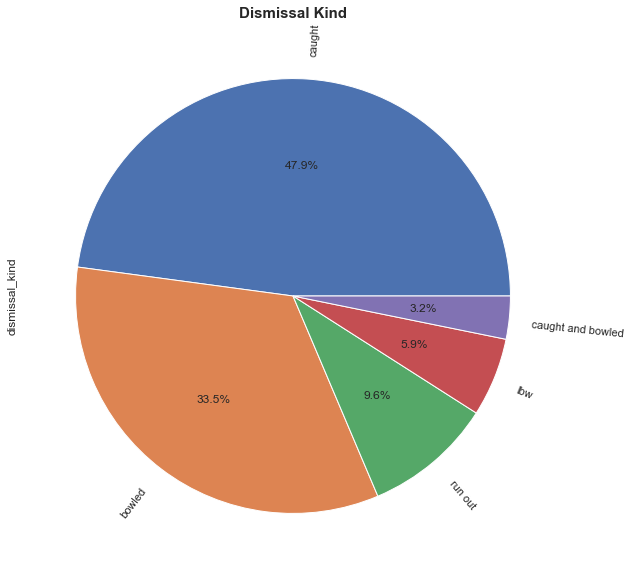

In [201]:
df_malinga['dismissal_kind'].value_counts ().plot.pie(autopct='%1.1f%%', shadow=False, rotatelabels=True)
plt.title("Dismissal Kind", fontweight="bold", fontsize=15)
plt.show()

In [205]:
print("Total Number of Wickets Taken By Lasith Malinga : ",df_malinga["is_wicket"].sum())

Total Number of Wickets Taken By Lasith Malinga :  188


In [217]:
print("Total Number of Runs Conceded By Lasith Malinga : ",df_malinga["total_runs"].sum())

Total Number of Runs Conceded By Lasith Malinga :  3486


## Dwayne Bravo

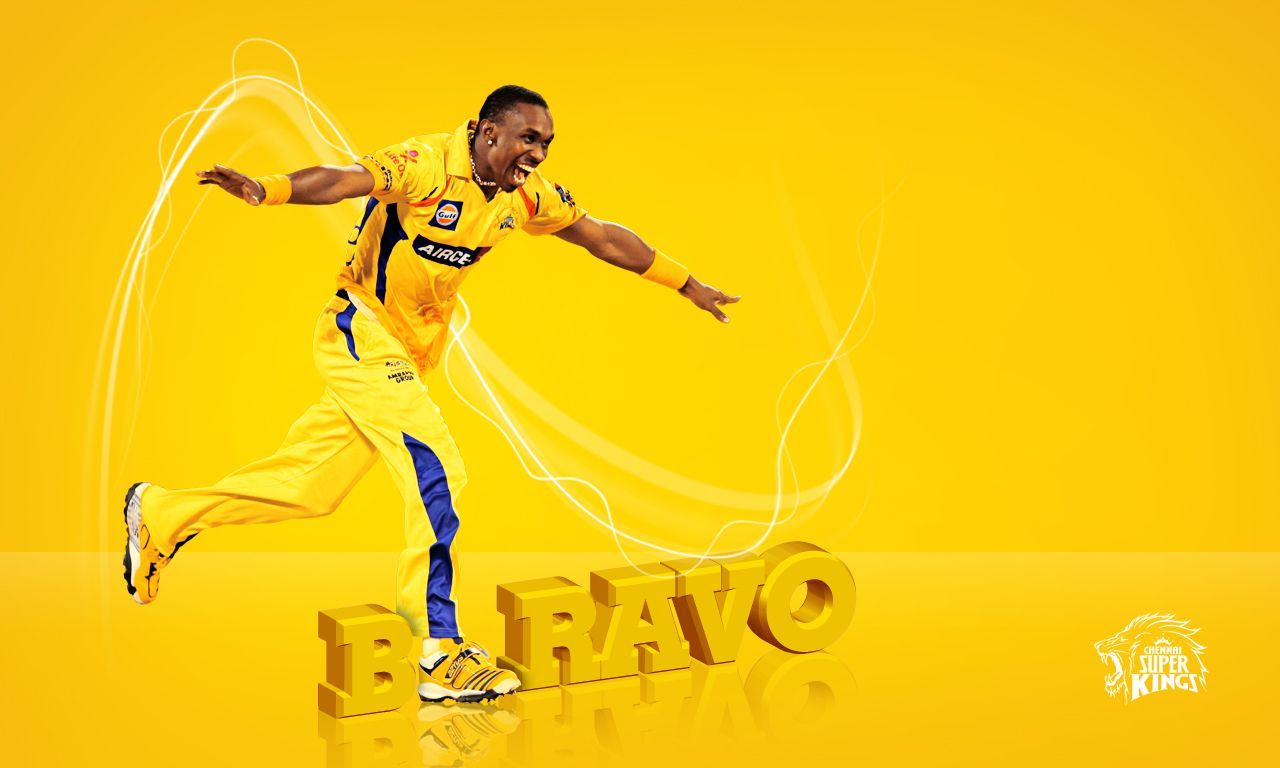

In [218]:
player = (ball_data[ 'bowler']=='DJ Bravo')
df_bravo=ball_data[player]
df_bravo.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
1755,335989,1,8,1,SK Raina,ML Hayden,DJ Bravo,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Mumbai Indians
1756,335989,1,8,2,SK Raina,ML Hayden,DJ Bravo,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Mumbai Indians
1757,335989,1,8,3,SK Raina,ML Hayden,DJ Bravo,0,1,1,0,0,NaN,NaN,NaN,legbyes,Chennai Super Kings,Mumbai Indians
1758,335989,1,8,4,ML Hayden,SK Raina,DJ Bravo,4,0,4,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Mumbai Indians
1759,335989,1,8,5,ML Hayden,SK Raina,DJ Bravo,1,0,1,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Mumbai Indians


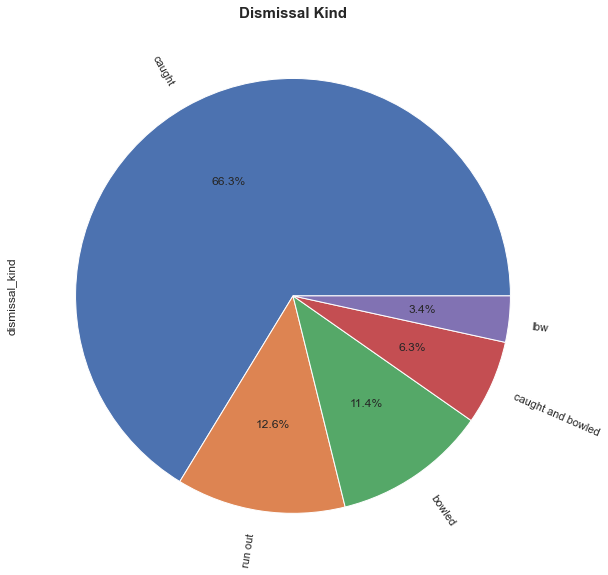

In [219]:
df_bravo['dismissal_kind'].value_counts ().plot.pie(autopct='%1.1f%%', shadow=False, rotatelabels=True)
plt.title("Dismissal Kind", fontweight="bold", fontsize=15)
plt.show()

In [220]:
print("Total Number of Wickets Taken By Lasith Malinga : ",df_bravo["is_wicket"].sum())

Total Number of Wickets Taken By Lasith Malinga :  175


In [221]:
print("Total Number of Runs Conceded By Lasith Malinga : ",df_bravo["total_runs"].sum())

Total Number of Runs Conceded By Lasith Malinga :  3869


## Top 10 Run Scorers

In [226]:
runs = ball_data.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns=['Batsman', 'runs']
y = runs.sort_values(by='runs', ascending = False).head (10).reset_index().drop('index', axis=1)
y

,Batsman,runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
5,AB de Villiers,4849
6,CH Gayle,4772
7,MS Dhoni,4632
8,RV Uthappa,4607
9,G Gambhir,4217


Text(0.5, 1.0, 'Top 10 run scorers in IPL')

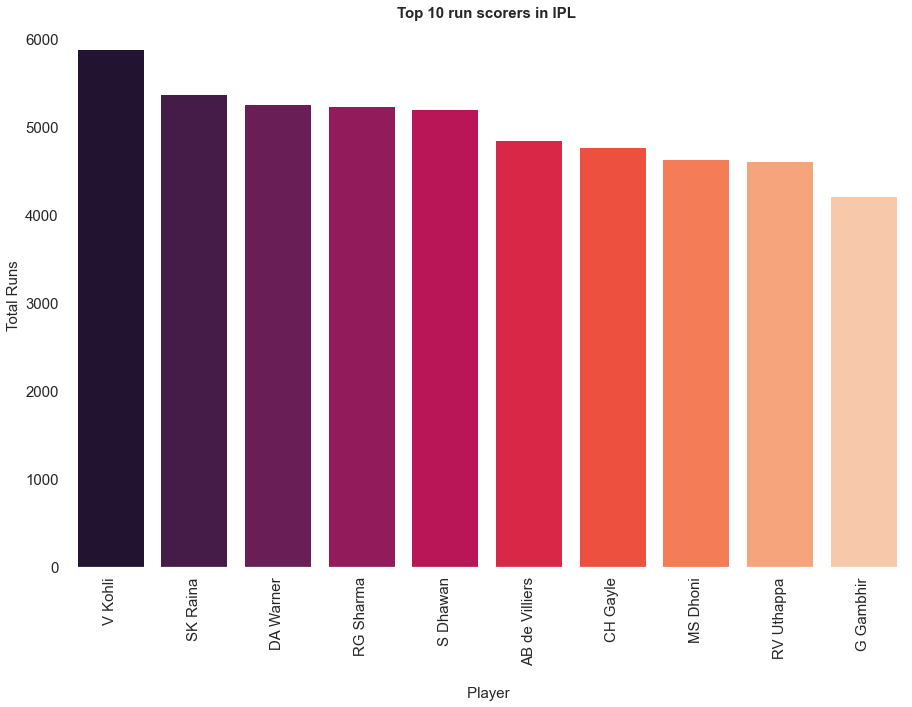

In [186]:
ax = plt.axes()
ax.set(facecolor = "white")
sns.barplot(x=y['Batsman'],y=y['runs'],palette='rocket', saturation=1)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('\n Player', fontsize=15)
plt.ylabel ('Total Runs', fontsize=15)
sns.set(rc={'figure.figsize':(15,10)})
plt.title('Top 10 run scorers in IPL', fontsize=15, fontweight="bold")


## Top 10 Wicket Takers

In [192]:
wickets = ball_data.groupby(['bowler'])['is_wicket'].sum().reset_index()
wickets.columns=['bowler', 'wickets']
y = wickets.sort_values(by='wickets', ascending = False).head (10).reset_index().drop('index', axis=1)
y

,bowler,wickets
0,SL Malinga,188
1,DJ Bravo,175
2,A Mishra,169
3,PP Chawla,164
4,Harbhajan Singh,161
5,R Ashwin,153
6,B Kumar,146
7,SP Narine,143
8,UT Yadav,137
9,R Vinay Kumar,127


Text(0.5, 1.0, 'Top 10 Wicket Takers in IPL')

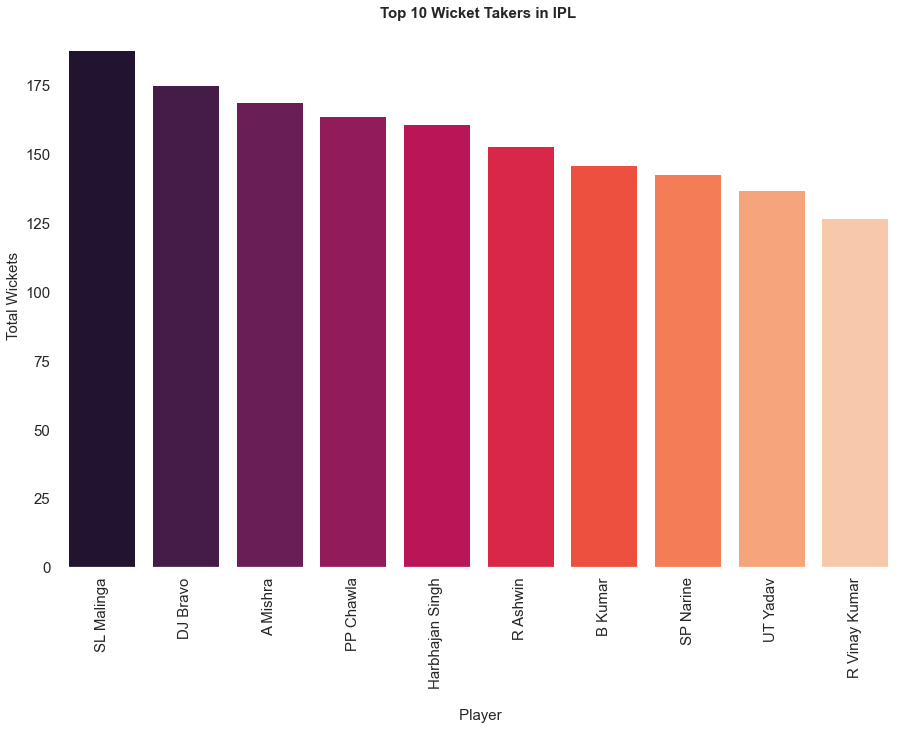

In [193]:
ax = plt.axes()
ax.set(facecolor = "white")
sns.barplot(x=y['bowler'],y=y['wickets'],palette='rocket', saturation=1)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('\n Player', fontsize=15)
plt.ylabel ('Total Wickets', fontsize=15)
sns.set(rc={'figure.figsize':(15,10)})
plt.title('Top 10 Wicket Takers in IPL', fontsize=15, fontweight="bold")

# Most Number of "Man of The Match" Award Winners

Text(0.5, 1.0, 'Highest MOM award winners')

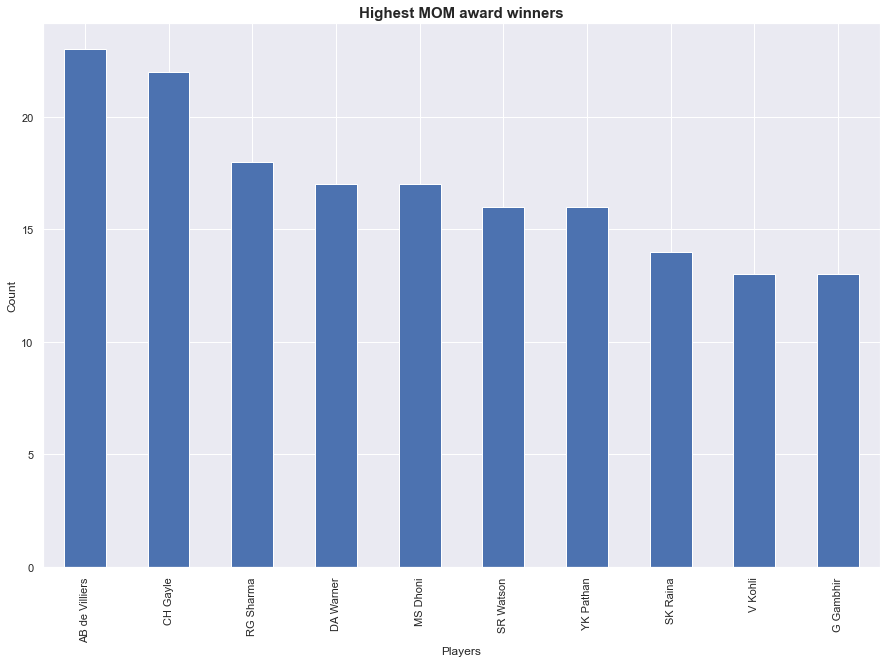

In [225]:
plt.axes ()
ax.set(facecolor = "black")
match_data.player_of_match.value_counts ()[:10].plot(kind='bar')
plt.xlabel('Players')
plt.ylabel("Count")
plt.title("Highest MOM award winners", fontsize=15, fontweight="bold")

